## 8.1 Implementing a Neural Network 

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4)

In [67]:
np.random.seed(0)

In [68]:
X, y = sklearn.datasets.make_moons(200, noise=0.20)

In [69]:
X

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

In [70]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

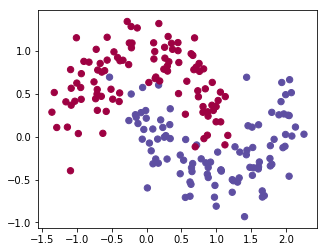

In [71]:
plt.scatter(X[:,0],X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [158]:
#Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)
print(X.shape)

(200, 2)


In [145]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

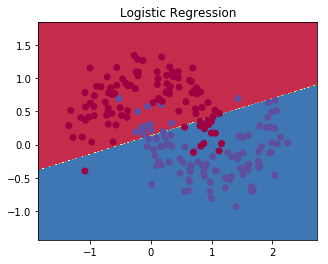

In [146]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also decay the learning rate over time.

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \tanh(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

### Implementation

Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [147]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

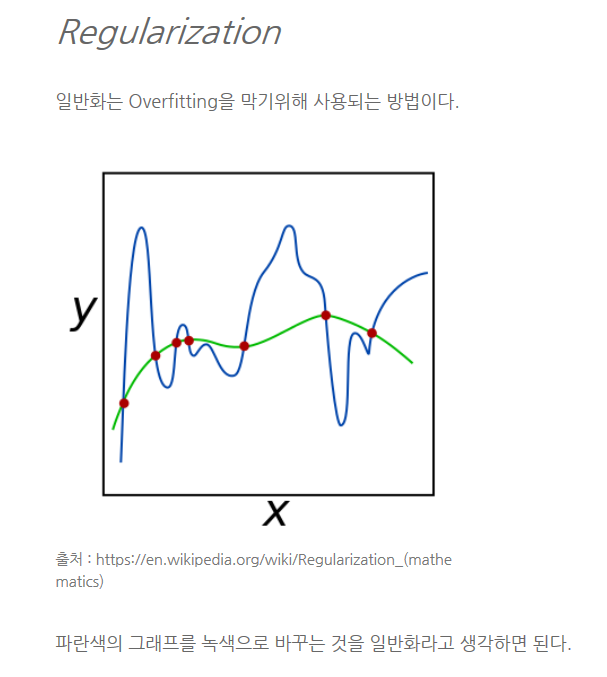

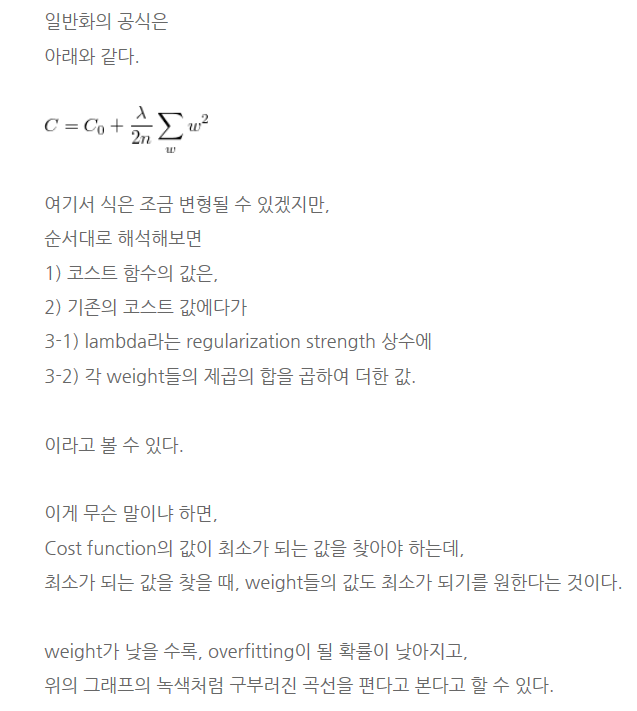

In [148]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [149]:
X

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

In [157]:
print(X.shape)
W1 = np.random.randn(nn_input_dim,3)/np.sqrt(nn_input_dim)


(200, 2)


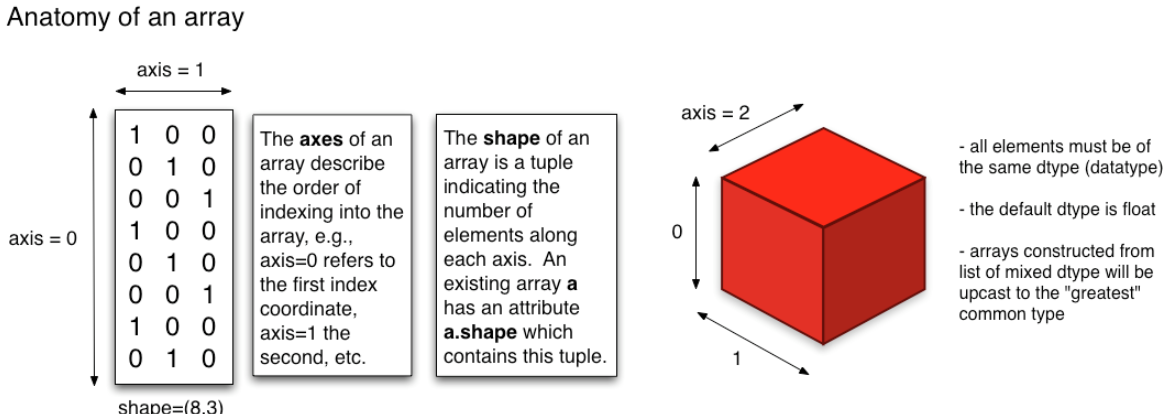

In [160]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # softmax
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add L2 regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return data_loss

In [164]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [165]:
def build_model(nn_hdim, epoch=20000, print_loss=False):
    """
    Learns parameters for the neural network and returns the model.
    
    Inputs
    ------
    nn_hdim: number of nodes in the hidden layer.
    epoch: number of passes through the training data for gradient descent.
    print_loss: if True, print the loss every 1000 iterations.
    
    """
    
    # Xavier Initialization.
    # Weights are initialized random but differ in range depending on the size of the previous layer.
    # Controlled, hence faster and more efficient gradient descent.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(epoch):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta2 = probs
        delta2[range(num_examples), y] -= 1
        
        dW2 = (a1.T).dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        
        delta1 = delta2.dot(W2.T) * (1 - np.power(a1, 2))
        
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        # Add regularization terms; weight is decayed linearly with L2 regularization.
        # b1 and b2 don't have regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print(f'Loss after iteration {i}: {calculate_loss(model)}')
    
    return model             

Loss after iteration 0: 86.47732630509849
Loss after iteration 1000: 13.789307623968135
Loss after iteration 2000: 13.806655617653579
Loss after iteration 3000: 14.15038955499286
Loss after iteration 4000: 14.149663172763248
Loss after iteration 5000: 14.150239921026786
Loss after iteration 6000: 14.150814535310134
Loss after iteration 7000: 14.151211979735464
Loss after iteration 8000: 14.151455246377246
Loss after iteration 9000: 14.151591730280217
Loss after iteration 10000: 14.151660336179464
Loss after iteration 11000: 14.15168807240076
Loss after iteration 12000: 14.151692459365155
Loss after iteration 13000: 14.151684408144652
Loss after iteration 14000: 14.151670486158272
Loss after iteration 15000: 14.151654503093209
Loss after iteration 16000: 14.151638563335945
Loss after iteration 17000: 14.15162374256822
Loss after iteration 18000: 14.151610512881735
Loss after iteration 19000: 14.151599004738882


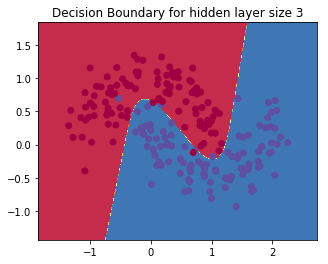

In [166]:
# Build a model with a 3-dimensional hidden layer
model= build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

# Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.

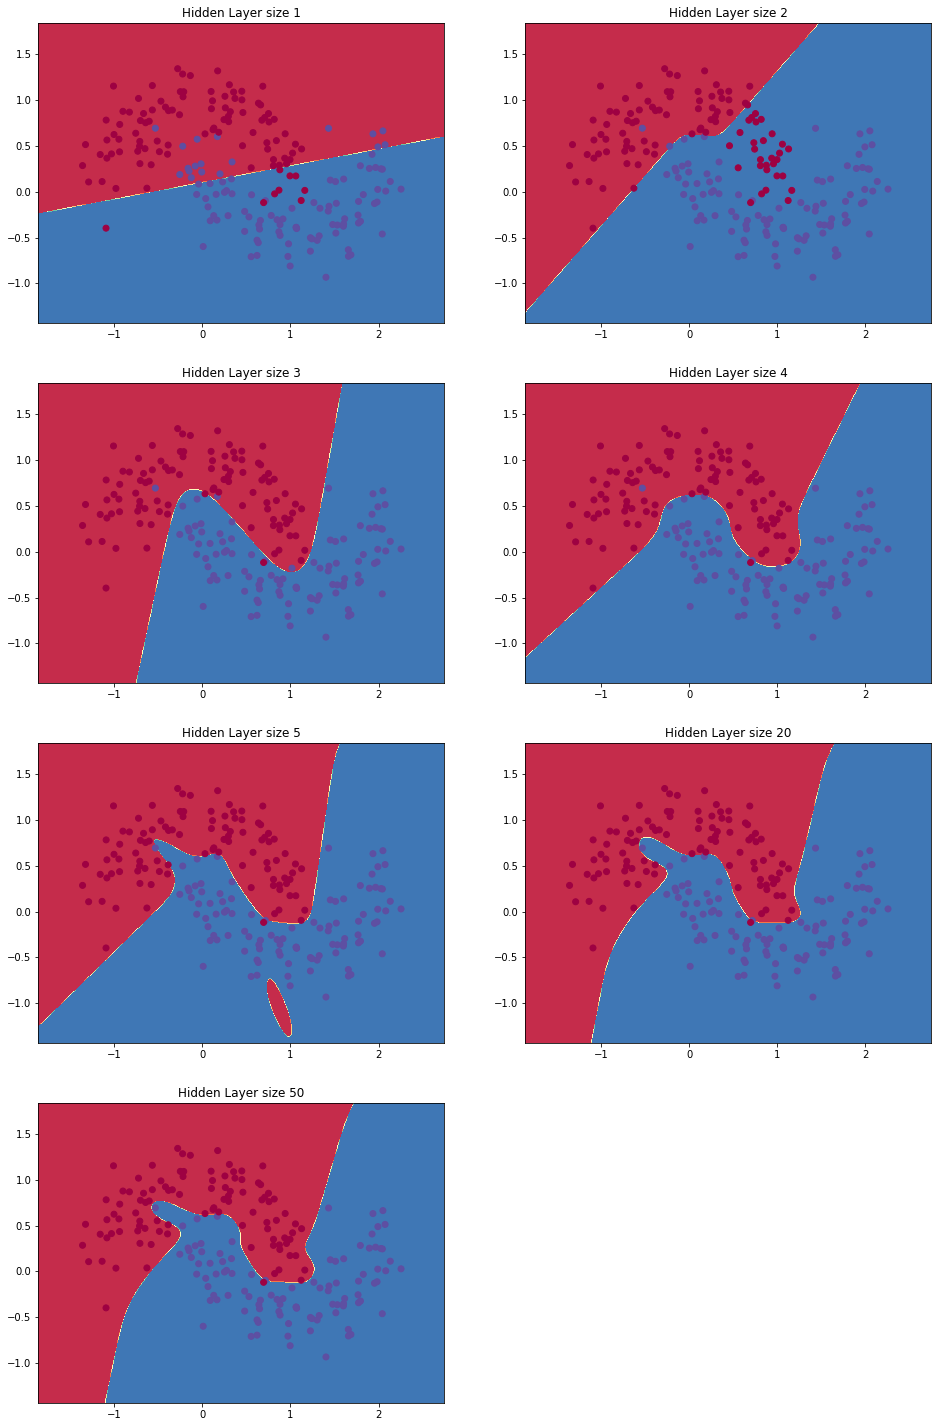

In [170]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()